## Problem Definition
The project aims to develop an automatic model for early Alzheimer's disease (AD) detection using speech analysis. The critical challenge addressed is the need for accessible and timely methods of identifying AD onset, considering the significant impact of delayed diagnosis on patient outcomes. By leveraging advanced deep learning algorithms, the model seeks to analyze subtle linguistic changes in speech patterns that may signify the early stages of AD, thus enabling accurate diagnosis and timely intervention. This initiative responds to the urgent need for innovative approaches to AD detection, aiming to revolutionize early diagnosis practices and ultimately improve patient care and quality of life.


In [ ]:
# Essential libraries
import numpy as np
import pandas as pd
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras import applications,activations
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras import optimizers,utils,regularizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization,ZeroPadding2D, Input
from keras.layers import Conv2D, Activation,MaxPooling2D
from keras import backend as k
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [ ]:
pip install livelossplot

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from livelossplot import PlotLossesKerasTF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mini_project_entities/large_dataset_alzimer.csv')

In [ ]:
df

,Age(Month),Sex,Group,Education,mor_Utts,mor_words,mor_syllables,all_words,words_min,syllables_min,...,u-cop,det:art,*-PAST,*-3S,irr-3S,u-aux,c-cop,c-aux,Total_non_zero_mors,File
0,684,1,ProbableAD,18,10.0,76.0,100.0,94.0,138.1820,181.8180,...,1.0,12.0,0.0,0.0,1.0,4.0,3.0,1.0,9.0,001-0.cha
1,708,1,ProbableAD,11,13.0,108.0,129.0,150.0,106.2300,126.8850,...,4.0,14.0,0.0,0.0,2.0,1.0,3.5,2.0,11.0,001-2.cha
2,696,0,Control,30,18.0,133.0,176.0,147.0,153.4620,203.0770,...,4.0,21.0,0.0,2.0,0.0,5.0,3.5,2.0,10.0,002-0.cha
3,708,0,Control,30,15.0,96.0,131.0,100.0,147.6920,201.5380,...,1.0,15.0,0.0,0.0,0.0,4.0,3.0,4.0,9.0,002-1.cha
4,720,0,Control,30,16.0,147.0,195.0,155.0,169.6150,225.0000,...,4.0,21.0,0.0,2.0,1.0,6.0,3.0,4.0,11.0,002-2.cha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,888,0,PossibleAD,21,13.0,90.0,117.0,93.0,204.7725,262.6295,...,1.0,13.0,0.0,2.0,1.0,3.0,2.0,0.0,10.0,707-0.cha
2192,888,0,Control,26,10.0,79.0,99.0,86.0,204.7725,258.2610,...,0.0,11.0,0.0,0.0,0.0,2.0,1.0,4.0,9.0,709-0.cha
2193,912,0,Control,0,15.0,118.0,145.0,144.0,157.3330,193.3330,...,3.0,18.0,0.0,0.0,1.0,5.0,3.5,4.0,10.0,709-2.cha
2194,924,1,PossibleAD,25,17.0,124.0,162.0,138.0,169.0910,220.9090,...,1.0,14.0,0.0,0.0,0.0,4.0,3.5,6.0,10.0,711-0.cha


In [ ]:
columns_to_copy = [
    'Age(Month)',
    'Group',
    'mor_Utts',
    'mor_words',
    'mor_syllables',
    'words_min',
    'syllables_min',
    '%_WWR',
    '%_mono-WWR',
    '%_WWR-RU',
    '%_mono-WWR-RU',
    'Mean_RU',
    '%_Phonological_fragment',
    '%_Phrase_repetitions',
    '%_Word_revisions',
    '%_Phrase_revisions',
    '%_Pauses',
    '%_Filled_pauses',
    '%_TD',
    '%_SLD',
    '%_Total_(SLD+TD)',
    'SLD_Ratio',
    'Content_all_words_ratio',
    'Function_all_words_ratio',
    'Weighted_SLD',
    'MLU_Words',
    'MLU_Morphemes',
    'FREQ_types',
    'FREQ_tokens',
    'Verbs_Utt',
    'TD_Words',
    'TD_Words_Time',
    'Word_Errors',
    'Utt_Errors',
    'retracing',
    'repetition',
    'DSS_Utts',
    'mor_Words',
    '*-PRESP',
    'in',
    'irr-PAST',
    'u-cop',
    'det:art',
    'irr-3S',
    'u-aux'
]

df = df[columns_to_copy].copy()

In [ ]:
print(df['Group'].value_counts())

Group
Control       972
ProbableAD    940
MCI           168
PossibleAD     84
Vascular       20
Memory         12
Name: count, dtype: int64


In [ ]:
df['Group'] = df['Group'].replace('Control',0)
df['Group'] = df['Group'].replace('MCI',1)
df['Group'] = df['Group'].replace('Memory',2)
df['Group'] = df['Group'].replace('Vascular',3)
df['Group'] = df['Group'].replace('PossibleAD',4)
df['Group'] = df['Group'].replace('ProbableAD',5)

In [ ]:
df

,Age(Month),Group,mor_Utts,mor_words,mor_syllables,words_min,syllables_min,%_WWR,%_mono-WWR,%_WWR-RU,...,repetition,DSS_Utts,mor_Words,*-PRESP,in,irr-PAST,u-cop,det:art,irr-3S,u-aux
0,684,5,10.0,76.0,100.0,138.1820,181.8180,1.000,1.000,1.000,...,1.0,8.0,80.0,5.0,3.0,0.0,1.0,12.0,1.0,4.0
1,708,5,13.0,108.0,129.0,106.2300,126.8850,2.632,2.632,2.632,...,3.0,10.0,119.0,6.0,3.0,1.0,4.0,14.0,2.0,1.0
2,696,0,18.0,133.0,176.0,153.4620,203.0770,0.568,0.568,0.568,...,2.0,13.0,132.0,6.0,3.0,0.0,4.0,21.0,0.0,5.0
3,708,0,15.0,96.0,131.0,147.6920,201.5380,0.000,0.000,0.000,...,0.0,12.0,103.0,8.0,2.0,0.0,1.0,15.0,0.0,4.0
4,720,0,16.0,147.0,195.0,169.6150,225.0000,0.513,0.513,0.513,...,1.0,13.0,145.0,7.0,3.0,0.0,4.0,21.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,888,4,13.0,90.0,117.0,204.7725,262.6295,0.000,0.000,0.000,...,0.0,11.0,91.0,4.0,1.0,0.0,1.0,13.0,1.0,3.0
2192,888,0,10.0,79.0,99.0,204.7725,258.2610,2.632,2.632,2.632,...,3.0,7.0,77.0,6.0,1.0,1.0,0.0,11.0,0.0,2.0
2193,912,0,15.0,118.0,145.0,157.3330,193.3330,2.632,2.632,2.632,...,3.0,8.0,106.0,7.0,1.0,0.0,3.0,18.0,1.0,5.0
2194,924,4,17.0,124.0,162.0,169.0910,220.9090,0.617,0.617,0.617,...,1.0,13.0,127.0,9.0,1.0,2.0,1.0,14.0,0.0,4.0


In [ ]:
y = df['Group']
x = df.drop(['Group'],axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x1, x_test, y1, y_test = train_test_split(x, y, test_size=0.10)
x_train, x_val, y_train, y_val = train_test_split(x1, y1, test_size=0.20)

In [ ]:
print(x_train['Age(Month)'].size)
print(x_val['Age(Month)'].size)
print(x_test['Age(Month)'].size)

1580
396
220


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [ ]:
model = Sequential()
model.add(Dense(units = 256, activation = 'relu', input_dim = 44))
model.add(BatchNormalization())

model.add(Dense(units = 128, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())

model.add(Dense(units = 64, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units = 32, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units = 16, activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(units = 6, activation = 'softmax'))

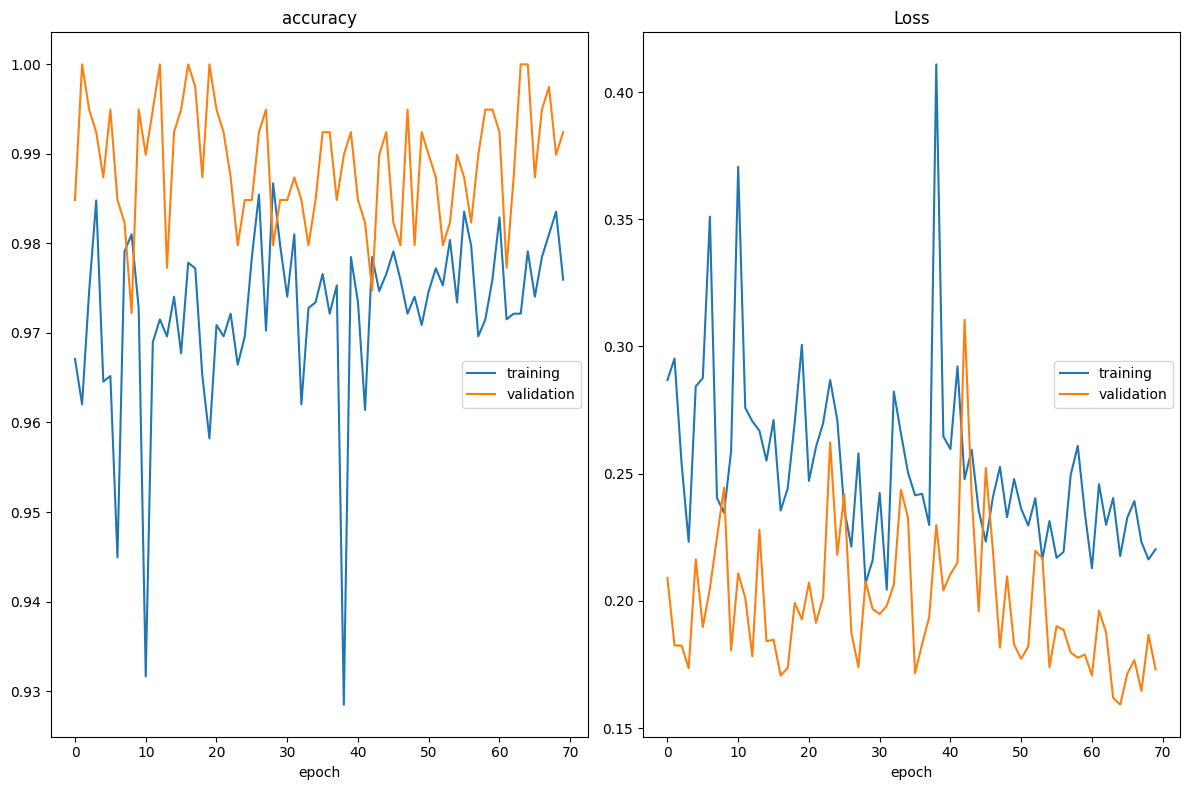

accuracy
	training         	 (min:    0.928, max:    0.987, cur:    0.976)
	validation       	 (min:    0.972, max:    1.000, cur:    0.992)
Loss
	training         	 (min:    0.204, max:    0.411, cur:    0.220)
	validation       	 (min:    0.159, max:    0.311, cur:    0.173)
50/50 [==============================] - 3s 56ms/step - loss: 0.2203 - accuracy: 0.9759 - val_loss: 0.1730 - val_accuracy: 0.9924


In [ ]:
opt = optimizers.Adam(lr=0.004)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=70, validation_data=(x_val,y_val),callbacks=[PlotLossesKerasTF()])

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test,y_test)

# Print the final metrics
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

7/7 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9955
Test Loss: 0.19279174506664276
Test Accuracy: 0.9954545497894287


In [ ]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               11520     
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0

In [ ]:
path = '/content/drive/MyDrive/Mini_project_entities/'
model.save(path + 'model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(units = 256, activation = 'relu', input_dim = 44))
  model.add(BatchNormalization())

  model.add(Dense(units = 256, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())

  model.add(Dense(units = 128, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())

  model.add(Dense(units = 128, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())

  model.add(Dense(units = 64, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())

  model.add(Dense(units = 32, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())

  model.add(Dense(units = 16, activation = 'relu'))
  model.add(BatchNormalization())

  model.add(Dense(units = 6, activation = 'softmax'))
  return model

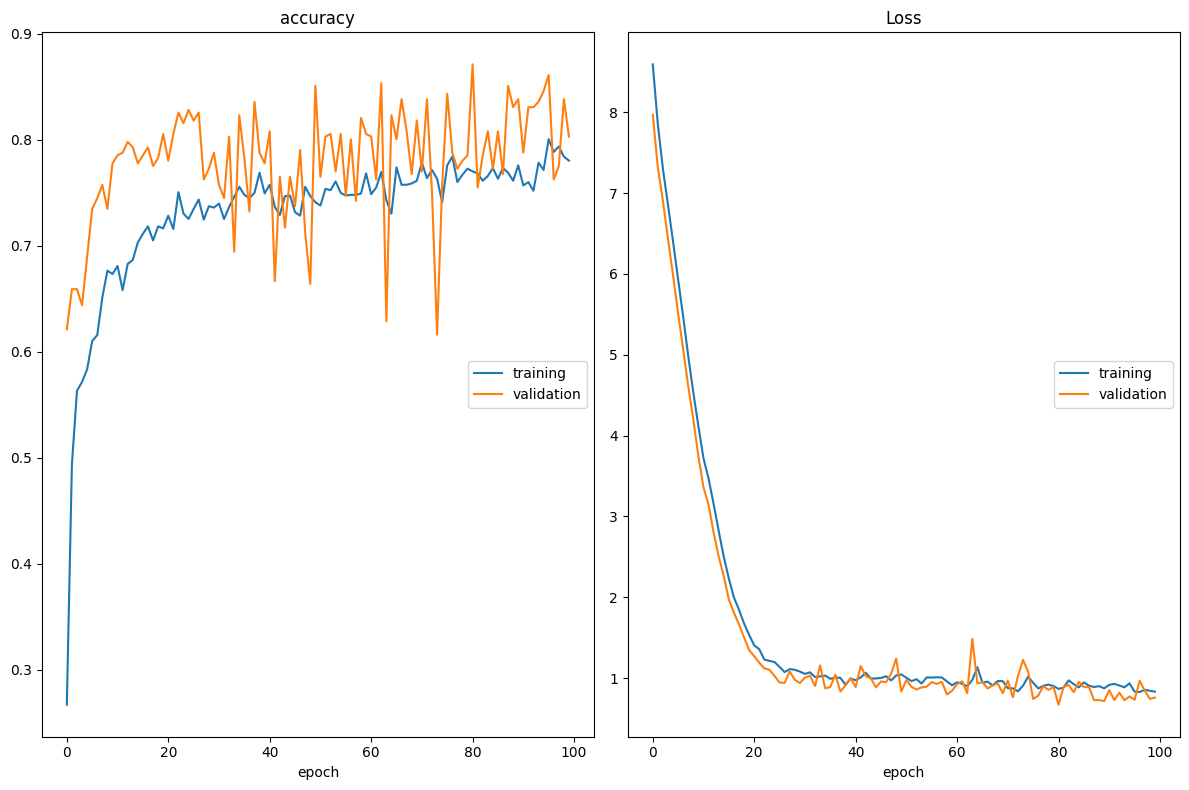

accuracy
	training         	 (min:    0.267, max:    0.801, cur:    0.780)
	validation       	 (min:    0.616, max:    0.871, cur:    0.803)
Loss
	training         	 (min:    0.827, max:    8.593, cur:    0.832)
	validation       	 (min:    0.671, max:    7.971, cur:    0.758)
198/198 [==============================] - 2s 11ms/step - loss: 0.8324 - accuracy: 0.7804 - val_loss: 0.7580 - val_accuracy: 0.8030


In [ ]:
from keras.optimizers import Adam, Adagrad, Adamax, SGD, Nadam
import math

def step_decay(epoch):
  initial_lrate = 0.004
  drop = 0.3
  epochs_drop = 3.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
optimizer = Adam(lr=0.01)

model1 = create_model()
model1.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
his1 = model1.fit(x_train, y_train, batch_size=8, epochs=100, validation_data=(x_val,y_val),callbacks=[PlotLossesKerasTF()])

In [ ]:
test_loss, test_accuracy = model1.evaluate(x_test,y_test)

# Print the final metrics
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

7/7 [==============================] - 0s 6ms/step - loss: 0.7586 - accuracy: 0.8182
Test Loss: 0.7585957050323486
Test Accuracy: 0.8181818127632141


In [ ]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               11520     
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0

In [ ]:
path = '/content/drive/MyDrive/Mini_project_entities/'
model1.save(path + 'model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def step_decay(epoch):
  initial_lrate = 0.009
  drop = 0.7
  epochs_drop = 30.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

opt = Adagrad(lr=0.0)

model2 = create_model()
model2.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
his2 = model2.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val,y_val), callbacks = callbacks_list)

Epoch 1/100
50/50 [==============================] - 4s 17ms/step - loss: 8.5703 - accuracy: 0.2456 - val_loss: 8.0354 - val_accuracy: 0.5859 - lr: 0.0090
Epoch 2/100
50/50 [==============================] - 0s 9ms/step - loss: 7.9223 - accuracy: 0.4171 - val_loss: 7.5959 - val_accuracy: 0.5960 - lr: 0.0090
Epoch 3/100
50/50 [==============================] - 0s 8ms/step - loss: 7.5239 - accuracy: 0.5158 - val_loss: 7.1743 - val_accuracy: 0.6263 - lr: 0.0090
Epoch 4/100
50/50 [==============================] - 0s 9ms/step - loss: 7.1162 - accuracy: 0.6120 - val_loss: 6.8202 - val_accuracy: 0.6869 - lr: 0.0090
Epoch 5/100
50/50 [==============================] - 0s 9ms/step - loss: 6.7929 - accuracy: 0.6500 - val_loss: 6.4917 - val_accuracy: 0.7475 - lr: 0.0090
Epoch 6/100
50/50 [==============================] - 0s 9ms/step - loss: 6.5389 - accuracy: 0.6804 - val_loss: 6.2180 - val_accuracy: 0.7753 - lr: 0.0090
Epoch 7/100
50/50 [==============================] - 0s 8ms/step - loss: 6.

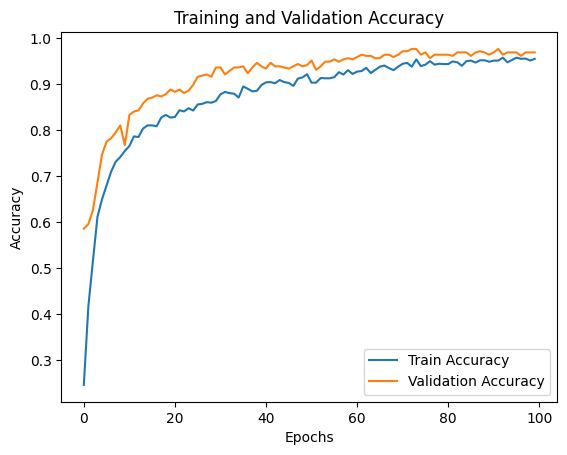

In [ ]:
# Plot training and validation accuracy
plt.plot(his2.history['accuracy'], label='Train Accuracy')
plt.plot(his2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

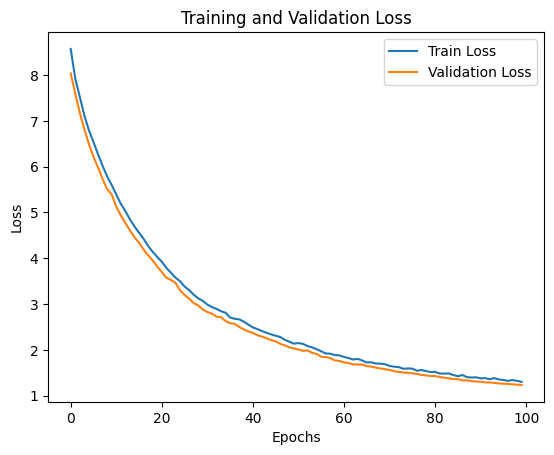

In [ ]:
# Plot training and validation loss
plt.plot(his2.history['loss'], label='Train Loss')
plt.plot(his2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model2.evaluate(x_test,y_test)

# Print the final metrics
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

7/7 [==============================] - 0s 5ms/step - loss: 1.2220 - accuracy: 0.9773
Test Loss: 1.222029685974121
Test Accuracy: 0.9772727489471436


In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 256)               11520     
                                                                 
 batch_normalization_19 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_26 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_20 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)              

In [ ]:
path = '/content/drive/MyDrive/Mini_project_entities/'
model2.save(path + 'model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def step_decay(epoch):
  initial_lrate = 0.005
  drop = 0.8
  epochs_drop = 8.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

opt = Adamax(lr=0.01)

model3 = create_model()
model3.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
his3 = model3.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val,y_val), callbacks = callbacks_list)

Epoch 1/100
50/50 [==============================] - 7s 16ms/step - loss: 8.2318 - accuracy: 0.3722 - val_loss: 7.2684 - val_accuracy: 0.6970 - lr: 0.0050
Epoch 2/100
50/50 [==============================] - 0s 8ms/step - loss: 6.8417 - accuracy: 0.6101 - val_loss: 6.1418 - val_accuracy: 0.7045 - lr: 0.0050
Epoch 3/100
50/50 [==============================] - 0s 9ms/step - loss: 5.8159 - accuracy: 0.7025 - val_loss: 5.2635 - val_accuracy: 0.7298 - lr: 0.0050
Epoch 4/100
50/50 [==============================] - 0s 9ms/step - loss: 4.9866 - accuracy: 0.7405 - val_loss: 4.5735 - val_accuracy: 0.7677 - lr: 0.0050
Epoch 5/100
50/50 [==============================] - 0s 10ms/step - loss: 4.3586 - accuracy: 0.7551 - val_loss: 3.9681 - val_accuracy: 0.7955 - lr: 0.0050
Epoch 6/100
50/50 [==============================] - 0s 9ms/step - loss: 3.7739 - accuracy: 0.7747 - val_loss: 3.4966 - val_accuracy: 0.8056 - lr: 0.0050
Epoch 7/100
50/50 [==============================] - 0s 10ms/step - loss: 

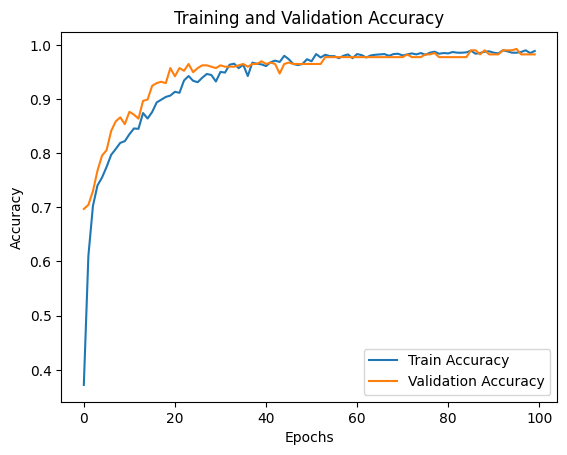

In [ ]:
# Plot training and validation accuracy
plt.plot(his3.history['accuracy'], label='Train Accuracy')
plt.plot(his3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

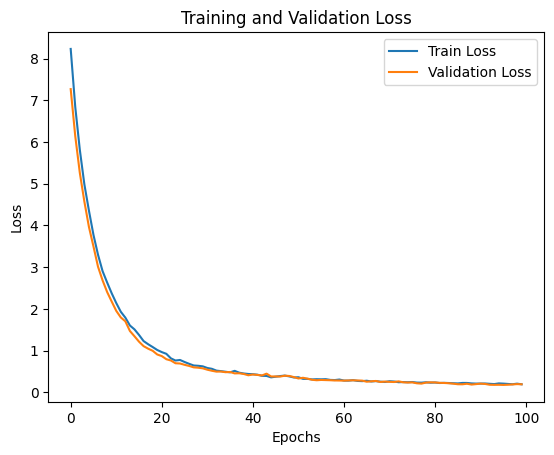

In [ ]:
# Plot training and validation loss
plt.plot(his3.history['loss'], label='Train Loss')
plt.plot(his3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 256)               11520     
                                                                 
 batch_normalization_47 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_58 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_48 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_59 (Dense)            (None, 128)               32896     
                                                                 
 dropout_26 (Dropout)        (None, 128)              

In [ ]:
test_loss, test_accuracy = model3.evaluate(x_test,y_test)

# Print the final metrics
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

7/7 [==============================] - 0s 5ms/step - loss: 0.1829 - accuracy: 0.9864
Test Loss: 0.18287687003612518
Test Accuracy: 0.9863636493682861


In [ ]:
path = '/content/drive/MyDrive/Mini_project_entities/'
model3.save(path + 'model3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def step_decay(epoch):
  initial_lrate = 0.005
  drop = 0.3
  epochs_drop = 13.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

opt = Nadam(lr=0.01)

model4 = create_model()
model4.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
his4 = model4.fit(x_train, y_train, batch_size=32, epochs=70, validation_data=(x_val,y_val), callbacks = callbacks_list)

Epoch 1/70
50/50 [==============================] - 14s 18ms/step - loss: 7.5454 - accuracy: 0.4424 - val_loss: 5.6625 - val_accuracy: 0.7222 - lr: 0.0050
Epoch 2/70
50/50 [==============================] - 1s 11ms/step - loss: 4.2939 - accuracy: 0.7051 - val_loss: 3.0605 - val_accuracy: 0.7753 - lr: 0.0050
Epoch 3/70
50/50 [==============================] - 1s 11ms/step - loss: 2.3665 - accuracy: 0.7386 - val_loss: 1.9707 - val_accuracy: 0.6768 - lr: 0.0050
Epoch 4/70
50/50 [==============================] - 1s 11ms/step - loss: 1.6067 - accuracy: 0.7538 - val_loss: 1.4145 - val_accuracy: 0.7727 - lr: 0.0050
Epoch 5/70
50/50 [==============================] - 1s 11ms/step - loss: 1.2348 - accuracy: 0.7570 - val_loss: 1.2129 - val_accuracy: 0.7727 - lr: 0.0050
Epoch 6/70
50/50 [==============================] - 0s 10ms/step - loss: 1.0522 - accuracy: 0.7684 - val_loss: 0.9588 - val_accuracy: 0.8308 - lr: 0.0050
Epoch 7/70
50/50 [==============================] - 1s 10ms/step - loss: 0.

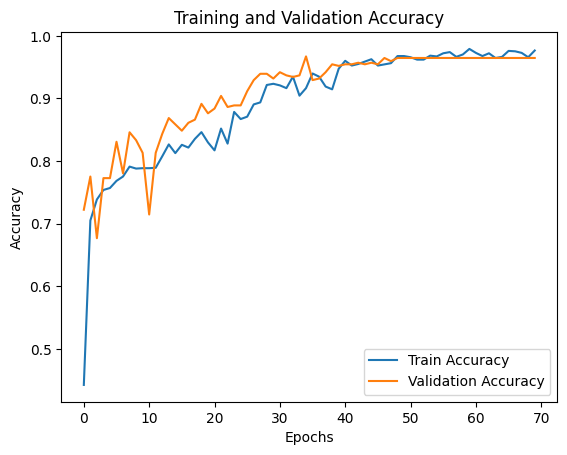

In [ ]:
# Plot training and validation accuracy
plt.plot(his4.history['accuracy'], label='Train Accuracy')
plt.plot(his4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

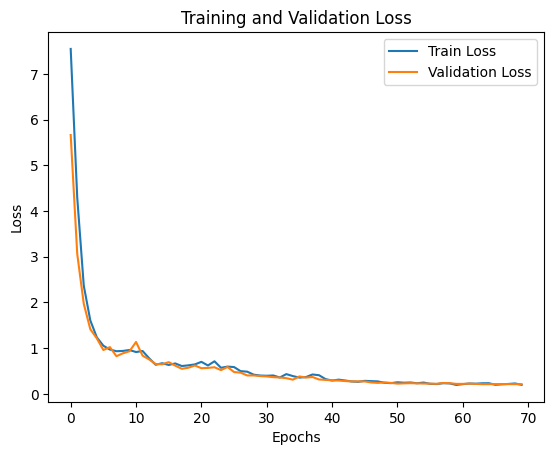

In [ ]:
# Plot training and validation loss
plt.plot(his4.history['loss'], label='Train Loss')
plt.plot(his4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model4.evaluate(x_test,y_test)

# Print the final metrics
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

7/7 [==============================] - 0s 6ms/step - loss: 0.1906 - accuracy: 0.9727
Test Loss: 0.19057507812976837
Test Accuracy: 0.9727272987365723


In [ ]:
path = '/content/drive/MyDrive/Mini_project_entities/'
model4.save(path + 'model4.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 256)               11520     
                                                                 
 batch_normalization_68 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_82 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_69 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_83 (Dense)            (None, 128)               32896     
                                                                 
 dropout_38 (Dropout)        (None, 128)             

In [ ]:
def step_decay(epoch):
  initial_lrate = 0.01
  drop = 0.7
  epochs_drop = 60.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
#opt = Nadam(lr=0.0)

model5 = create_model()
model5.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
his5 = model5.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val,y_val), callbacks = callbacks_list)

Epoch 1/100
50/50 [==============================] - 4s 26ms/step - loss: 8.8105 - accuracy: 0.1880 - val_loss: 8.3100 - val_accuracy: 0.5025 - lr: 0.0100
Epoch 2/100
50/50 [==============================] - 1s 13ms/step - loss: 8.3604 - accuracy: 0.3291 - val_loss: 8.0395 - val_accuracy: 0.4823 - lr: 0.0100
Epoch 3/100
50/50 [==============================] - 1s 15ms/step - loss: 7.9992 - accuracy: 0.4766 - val_loss: 7.7865 - val_accuracy: 0.5253 - lr: 0.0100
Epoch 4/100
50/50 [==============================] - 1s 10ms/step - loss: 7.6972 - accuracy: 0.5614 - val_loss: 7.5072 - val_accuracy: 0.6338 - lr: 0.0100
Epoch 5/100
50/50 [==============================] - 0s 8ms/step - loss: 7.4763 - accuracy: 0.6120 - val_loss: 7.2519 - val_accuracy: 0.6869 - lr: 0.0100
Epoch 6/100
50/50 [==============================] - 0s 9ms/step - loss: 7.2302 - accuracy: 0.6506 - val_loss: 7.0187 - val_accuracy: 0.7247 - lr: 0.0100
Epoch 7/100
50/50 [==============================] - 0s 9ms/step - loss:

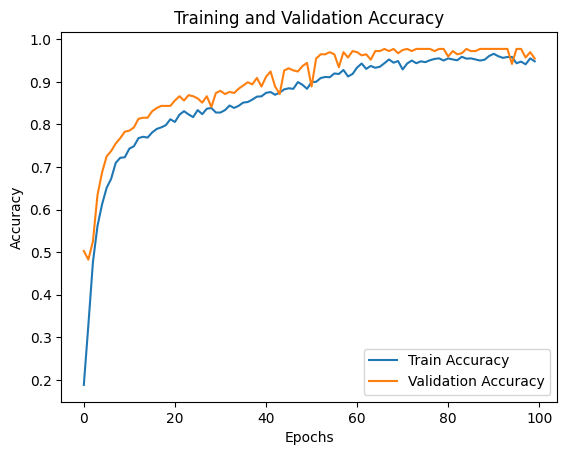

In [ ]:
# Plot training and validation accuracy
plt.plot(his5.history['accuracy'], label='Train Accuracy')
plt.plot(his5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

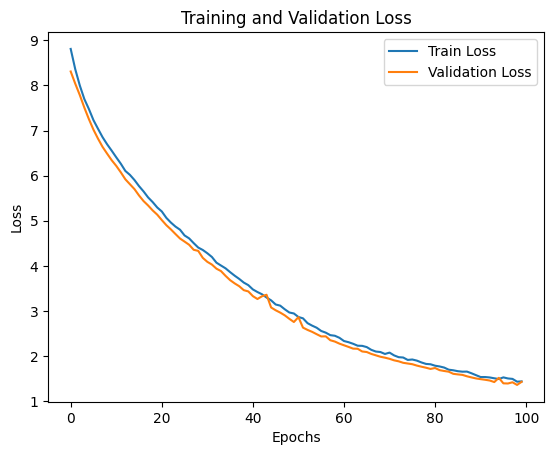

In [ ]:
# Plot training and validation loss
plt.plot(his5.history['loss'], label='Train Loss')
plt.plot(his5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model5.evaluate(x_test,y_test)

# Print the final metrics
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

7/7 [==============================] - 0s 5ms/step - loss: 1.4505 - accuracy: 0.9455
Test Loss: 1.4504908323287964
Test Accuracy: 0.9454545378684998


In [ ]:
path = '/content/drive/MyDrive/Mini_project_entities/'
model5.save(path + 'model5.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


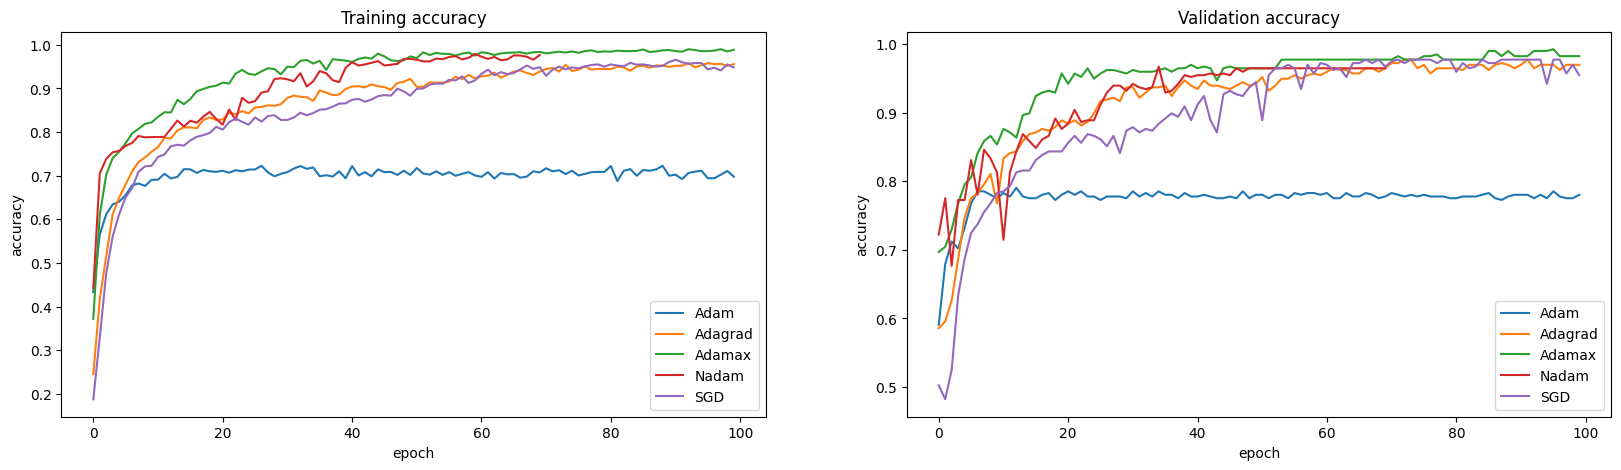

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].plot(his1.history['accuracy'])
axes[0].plot(his2.history['accuracy'])
axes[0].plot(his3.history['accuracy'])
axes[0].plot(his4.history['accuracy'])
axes[0].plot(his5.history['accuracy'])

axes[0].set_title('Training accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['Adam', 'Adagrad', 'Adamax', 'Nadam', 'SGD'])

# Validation
axes[1].plot(his1.history['val_accuracy'])
axes[1].plot(his2.history['val_accuracy'])
axes[1].plot(his3.history['val_accuracy'])
axes[1].plot(his4.history['val_accuracy'])
axes[1].plot(his5.history['val_accuracy'])

plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Adam', 'Adagrad', 'Adamax', 'Nadam', 'SGD'])
plt.show()

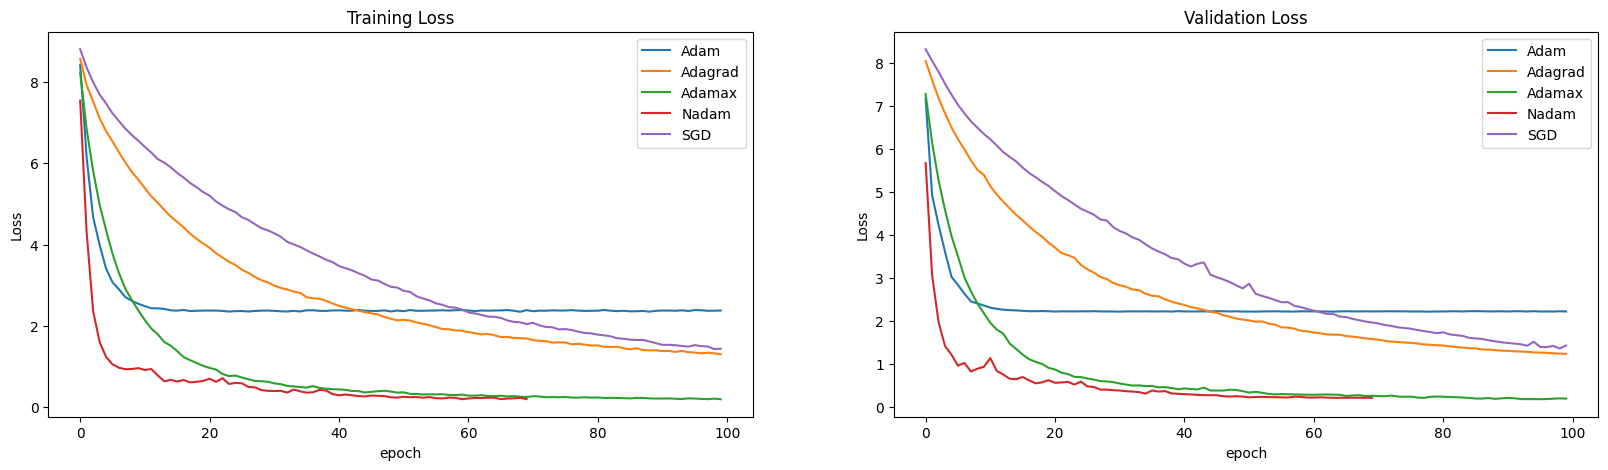

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].plot(his1.history['loss'])
axes[0].plot(his2.history['loss'])
axes[0].plot(his3.history['loss'])
axes[0].plot(his4.history['loss'])
axes[0].plot(his5.history['loss'])

axes[0].set_title('Training Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('epoch')
axes[0].legend(['Adam', 'Adagrad', 'Adamax',  'Nadam', 'SGD'], loc=1)

# Validation
axes[1].plot(his1.history['val_loss'])
axes[1].plot(his2.history['val_loss'])
axes[1].plot(his3.history['val_loss'])
axes[1].plot(his4.history['val_loss'])
axes[1].plot(his5.history['val_loss'])

plt.title('Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Adam', 'Adagrad', 'Adamax',  'Nadam', 'SGD'], loc=1)
plt.show()

In [ ]:
yhat_probs = model2.predict(x_test, verbose=0)
yhat_classes = yhat_probs.argmax(axis=-1)

In [ ]:
yhat_classes

array([5, 1, 1, 0, 5, 5, 5, 0, 5, 1, 5, 5, 0, 5, 5, 5, 1, 5, 0, 0, 5, 1,
       5, 5, 0, 5, 1, 5, 5, 0, 5, 0, 0, 5, 0, 5, 5, 5, 5, 1, 5, 0, 5, 5,
       0, 0, 5, 4, 0, 4, 0, 5, 5, 5, 4, 0, 5, 0, 0, 5, 0, 5, 5, 0, 5, 1,
       0, 4, 0, 0, 5, 0, 5, 5, 5, 5, 5, 0, 5, 0, 4, 0, 0, 0, 1, 0, 5, 5,
       5, 0, 5, 1, 5, 5, 0, 5, 5, 0, 1, 0, 0, 5, 5, 5, 0, 0, 5, 5, 0, 0,
       5, 4, 5, 0, 5, 0, 1, 0, 0, 0, 4, 5, 5, 0, 0, 5, 4, 0, 5, 1, 5, 0,
       0, 5, 0, 5, 0, 0, 5, 0, 1, 5, 0, 5, 0, 5, 1, 5, 0, 5, 0, 0, 0, 0,
       0, 5, 0, 5, 5, 5, 5, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 5, 5, 4, 1,
       0, 0, 1, 5, 4, 5, 5, 5, 5, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 4, 0,
       5, 5, 5, 0, 5, 0, 5, 5, 1, 0, 1, 5, 5, 5, 4, 0, 5, 5, 0, 0, 5, 5])

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, yhat_classes, normalize='true')
print(matrix)

[[0.98876404 0.01123596 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (4).

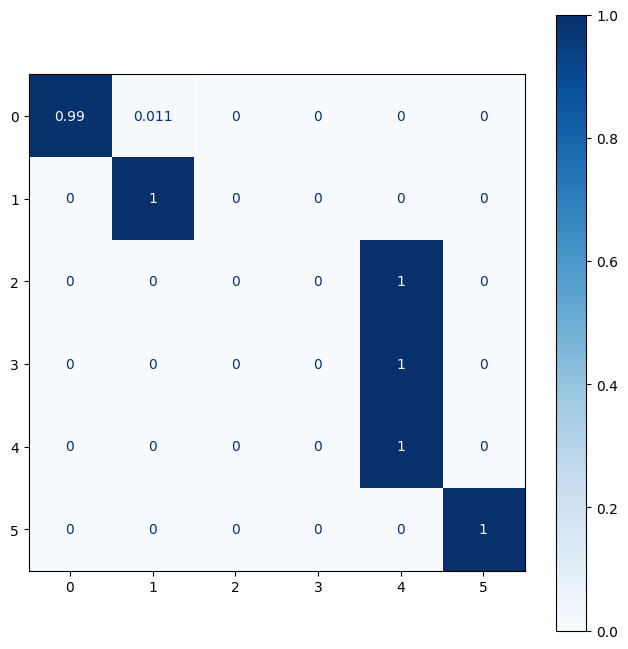

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

display_labels = ['Control','MCI','PossibleAD','ProbableAD']
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=display_labels)

fig, ax = plt.subplots(figsize=(8, 8))

disp = disp.plot(include_values=True, cmap=plt.cm.Blues, ax=ax, xticks_rotation='horizontal')
plt.show()

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Mini_project_entities/new_prepro_dataset_alzimer.csv')

In [ ]:
df2.shape

(554, 67)

In [ ]:
df['File'] = df2['File']

In [ ]:
df

,Age(Month),Group,mor_Utts,mor_words,mor_syllables,words_min,syllables_min,%_WWR,%_mono-WWR,%_WWR-RU,...,DSS_Utts,mor_Words,*-PRESP,in,irr-PAST,u-cop,det:art,irr-3S,u-aux,File
0,684,5,10.0,76.0,100.0,138.1820,181.8180,1.000,1.000,1.000,...,8.0,80.0,5.0,3.0,0.0,1.0,12.0,1.0,4.0,001-0.cha
1,708,5,13.0,108.0,129.0,106.2300,126.8850,2.632,2.632,2.632,...,10.0,119.0,6.0,3.0,1.0,4.0,14.0,2.0,1.0,001-2.cha
2,696,0,18.0,133.0,176.0,153.4620,203.0770,0.568,0.568,0.568,...,13.0,132.0,6.0,3.0,0.0,4.0,21.0,0.0,5.0,002-0.cha
3,708,0,15.0,96.0,131.0,147.6920,201.5380,0.000,0.000,0.000,...,12.0,103.0,8.0,2.0,0.0,1.0,15.0,0.0,4.0,002-1.cha
4,720,0,16.0,147.0,195.0,169.6150,225.0000,0.513,0.513,0.513,...,13.0,145.0,7.0,3.0,0.0,4.0,21.0,1.0,6.0,002-2.cha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,888,4,13.0,90.0,117.0,204.7725,262.6295,0.000,0.000,0.000,...,11.0,91.0,4.0,1.0,0.0,1.0,13.0,1.0,3.0,NaN
2192,888,0,10.0,79.0,99.0,204.7725,258.2610,2.632,2.632,2.632,...,7.0,77.0,6.0,1.0,1.0,0.0,11.0,0.0,2.0,NaN
2193,912,0,15.0,118.0,145.0,157.3330,193.3330,2.632,2.632,2.632,...,8.0,106.0,7.0,1.0,0.0,3.0,18.0,1.0,5.0,NaN
2194,924,4,17.0,124.0,162.0,169.0910,220.9090,0.617,0.617,0.617,...,13.0,127.0,9.0,1.0,2.0,1.0,14.0,0.0,4.0,NaN


In [ ]:
import numpy as np

def get_attributes_for_file(df, file_name):
    # Select the row corresponding to the given file name
    row = df.loc[df['File'] == file_name]

    # Check if the file name exists in the DataFrame
    if len(row) == 0:
        print(f"File '{file_name}' not found.")
        return None

    # Extract values of all attributes present in that row and convert to NumPy array
    attributes_array = row.iloc[0].values
    attributes_array = np.delete(attributes_array, [-1])  # Remove unwanted elements

    return attributes_array

# Example usage:
file_name = "066-0.cha"  # Replace with the desired file name
attributes = get_attributes_for_file(df, file_name)
if attributes is not None:
    print(attributes)


[948 5 12.0 108.0 134.0 196.364 243.636 0.0 0.0 0.0 0.0 0 0.746 0.0 0.746
 0.0 0.746 2.239 4.478 0.746 5.224 0.143 0.0 0.0 1.493 9.333 11.889 52.0
 98.0 1.6 87.0 3.4450000000000003 2.0 1.0 1.0 0.0 9.0 98.0 4.0 0.0 0.0 0.0
 15.0 0.0 2.0]


In [ ]:
attributes = np.delete(attributes, [1])
len(attributes)

44

In [ ]:
test_input = np.array(attributes, dtype=np.float32)  # Convert to float32
test_input = test_input.reshape(1, -1)
class_names = ['Control','MCI','Memory','Vascular','PossibleAD','ProbableAD']
result1 = model2.predict(test_input)
predicted_class_index = np.argmax(result1)
predicted_class = class_names[predicted_class_index]

print("Predicted class by model:", predicted_class)


1/1 [==============================] - 0s 41ms/step
Predicted class by model: ProbableAD


The terms you've listed appear to be related to different conditions and states related to cognitive health and dementia. Here's a brief explanation of each:

1. **Control**: In the context of cognitive health or dementia research, "control" typically refers to individuals who are part of a study but do not have the condition being investigated. They serve as a comparison group to individuals with the condition.

2. **Probable AD (Alzheimer's Disease)**: This refers to individuals who are diagnosed with Alzheimer's disease based on clinical criteria and symptoms, but without confirmation through post-mortem examination (autopsy).

3. **MCI (Mild Cognitive Impairment)**: MCI is a condition characterized by a slight but noticeable decline in cognitive abilities, such as memory and thinking skills, that is beyond what would be expected for a person's age but not severe enough to interfere significantly with daily life. MCI can sometimes be an early sign of Alzheimer's disease or other types of dementia.

4. **Possible AD**: This term may refer to individuals who exhibit symptoms suggestive of Alzheimer's disease but do not meet all the criteria for a definitive diagnosis of probable AD. It may also indicate individuals with cognitive impairment who are still undergoing evaluation and testing.

5. **Vascular Dementia**: Vascular dementia is a type of dementia that occurs when there is significant damage to the brain's blood vessels, leading to problems with memory, thinking, and other cognitive functions. It is typically caused by strokes or other conditions that affect blood flow to the brain.

6. **Memory**: This likely refers to the assessment or evaluation of memory function in individuals, which is often a key component of diagnosing and monitoring cognitive impairment and dementia.

7. **Other**: This category may encompass various conditions, diagnoses, or states not explicitly mentioned in the list, or it could represent a catch-all category for individuals who do not fit into the other specified groups.

These terms are commonly used in clinical and research settings related to cognitive health, dementia, and Alzheimer's disease to describe different diagnostic categories, states of cognitive function, and study populations.

In [ ]:
test_loss1, test_accuracy1 = model1.evaluate(x_test,y_test)
test_loss2, test_accuracy2 = model2.evaluate(x_test,y_test)
test_loss3, test_accuracy3 = model3.evaluate(x_test,y_test)
test_loss4, test_accuracy4 = model4.evaluate(x_test,y_test)
test_loss5, test_accuracy5 = model5.evaluate(x_test,y_test)
markdown_table = f"""
## Model Comparison

| Model  | Test Loss | Test Accuracy |
|--------|-----------|---------------|
| model1 |   {test_loss1:.4f}  |     {test_accuracy1:.4f}    |
| model2 |   {test_loss2:.4f}  |     {test_accuracy2:.4f}    |
| model3 |   {test_loss3:.4f}  |     {test_accuracy3:.4f}    |
| model4 |   {test_loss4:.4f}  |     {test_accuracy4:.4f}    |
| model5 |   {test_loss5:.4f}  |     {test_accuracy5:.4f}    |
"""

# Print the markdown table
print(markdown_table)

7/7 [==============================] - 0s 7ms/step - loss: 1.4505 - accuracy: 0.9455

## Model Comparison

| Model  | Test Loss | Test Accuracy |
|--------|-----------|---------------|
| model1 |   2.3153  |     0.7409    |
| model2 |   1.2220  |     0.9773    |
| model3 |   0.1829  |     0.9864    |
| model4 |   0.1906  |     0.9727    |
| model5 |   1.4505  |     0.9455    |



Based on the comparison of the five models' test loss and test accuracy, the following conclusions can be drawn:

1. **Model 1**: Despite achieving a decent test accuracy of approximately 74.09%, it exhibits the highest test loss among the models evaluated, indicating suboptimal performance in terms of minimizing loss.

2. **Model 2**: This model demonstrates a substantial improvement over Model 1, with a significantly lower test loss of approximately 1.2220 and a notably higher test accuracy of approximately 97.73%. It appears to outperform Model 1 by a substantial margin.

3. **Model 3**: Among the models evaluated, Model 3 exhibits the lowest test loss of approximately 0.1829, coupled with an impressive test accuracy of approximately 98.64%. This suggests that Model 3 performs exceptionally well in terms of both minimizing loss and accurately predicting outcomes.

4. **Model 4**: While Model 4 achieves a relatively low test loss of approximately 0.1906, its test accuracy of approximately 97.27% is slightly lower compared to Models 2 and 3. Nonetheless, it still performs admirably in terms of both metrics.

5. **Model 5**: Although Model 5 achieves a test accuracy of approximately 94.55%, its test loss of approximately 1.4505 is notably higher compared to Models 2, 3, and 4. This indicates that while it may perform adequately in terms of accuracy, it struggles to minimize loss effectively.

In conclusion, Model 3 emerges as the top-performing model among the ones evaluated, exhibiting the lowest test loss and the highest test accuracy. Models 2 and 4 also demonstrate commendable performance, while Models 1 and 5 appear to be comparatively less effective in achieving both low loss and high accuracy. These findings underscore the importance of carefully evaluating and selecting models based on their performance metrics to ensure optimal outcomes in practical applications.